In [157]:
import random
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [158]:
warnings.filterwarnings('ignore')

## 결측치 제거한 데이터 수집

In [159]:
train = pd.read_csv('data/train_null_only.csv')
test = pd.read_csv('data/test_null_only.csv')
submission = pd.read_csv('data/submission.csv')

In [160]:
train.shape, test.shape, submission.shape

((1459, 11), (715, 10), (715, 2))

In [161]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [162]:
train.isnull().sum()

id                        0
hour                      0
hour_bef_temperature      0
hour_bef_precipitation    0
hour_bef_windspeed        0
hour_bef_humidity         0
hour_bef_visibility       0
hour_bef_ozone            0
hour_bef_pm10             0
hour_bef_pm2.5            0
count                     0
dtype: int64

In [163]:
train.describe()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,1105.914325,11.493489,16.717447,0.031572,2.479048,52.231256,1405.217675,0.039155,57.168905,30.325747,108.563400
std,631.338681,6.922790,5.235555,0.174797,1.374005,20.356410,582.731618,0.018994,30.774814,14.110562,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,880.000000,0.026000,37.000000,21.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.400000,51.000000,1576.000000,0.039265,53.000000,28.000000,96.000000
75%,1651.000000,17.500000,20.050000,0.000000,3.400000,68.500000,1994.000000,0.051000,68.000000,36.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


## IQR 함수 선언

In [164]:
def outlier_iqr(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)          
    
    # IQR 계산하기     
    iqr = q75 - q25    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q25 - cut_off, q75 + cut_off     
    
    print('IQR은',iqr, '이다.')     
    print('lower bound 값은', lower, '이다.')     
    print('upper bound 값은', upper, '이다.')    
    
    # 1사 분위와 4사 분위에 속해있는 데이터 각각 저장하기     
    data1 = data[data[column] > upper]     
    data2 = data[data[column] < lower]    
    
    # 이상치 총 개수 구하기
    return print('총 이상치 개수는', data1.shape[0] + data2.shape[0], '이다.')

## IQR 적용을 통한 이상치 검출

## hour_bef_temperature

In [165]:
outlier_iqr(train,'hour_bef_temperature')

data_hour_bef_temperature = train[(train['hour_bef_temperature'] < upper) & (train['hour_bef_temperature'] > lower)]
len(data_hour_bef_temperature)

IQR은 7.25 이다.
lower bound 값은 1.9250000000000007 이다.
upper bound 값은 30.925 이다.
총 이상치 개수는 0 이다.


1459

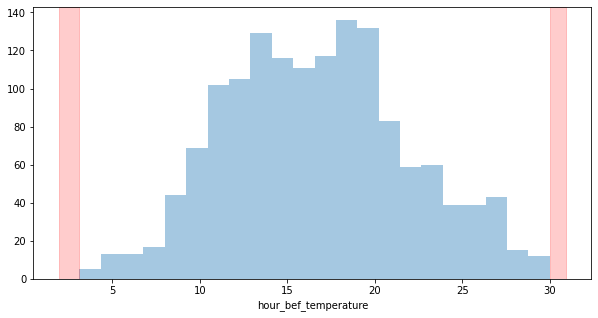

In [166]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_temperature, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_temperature.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_temperature.max(), alpha=0.2, color='red')

## hour_bef_humidity

In [167]:
outlier_iqr(train,'hour_bef_humidity')

data_hour_bef_humidity = train[(train['hour_bef_humidity'] < upper) & (train['hour_bef_humidity'] > lower)]
len(data_hour_bef_humidity)

IQR은 32.5 이다.
lower bound 값은 -12.75 이다.
upper bound 값은 117.25 이다.
총 이상치 개수는 0 이다.


1459

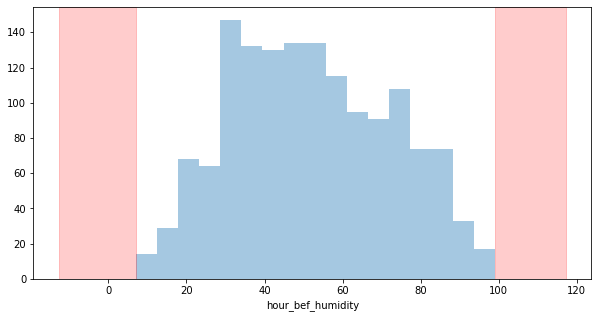

In [168]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_humidity, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_humidity.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_humidity.max(), alpha=0.2, color='red')

## hour_bef_ozone

In [169]:
outlier_iqr(train,'hour_bef_ozone')

data_hour_bef_ozone = train[(train['hour_bef_ozone'] < upper) & (train['hour_bef_ozone'] > lower)]
len(data_hour_bef_ozone)

IQR은 0.024999999999999998 이다.
lower bound 값은 -0.0115 이다.
upper bound 값은 0.0885 이다.
총 이상치 개수는 16 이다.


1443

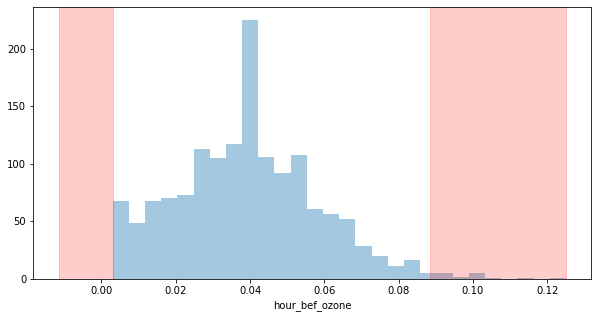

In [170]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_ozone, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_ozone.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_ozone.max(), alpha=0.2, color='red')

### hour_bef_ozone 이상치 16개 제거

In [171]:
train['hour_bef_ozone'] = data_hour_bef_ozone['hour_bef_ozone']

In [172]:
hour_bef_ozone.shape

(1443,)

In [173]:
train['hour_bef_ozone'].isnull().sum()

16

### 결측치 시간당 평균량으로 대체

In [174]:
train['hour_bef_ozone'].fillna(value = train.groupby('hour').mean()['hour_bef_ozone'].mean(), inplace = True)

In [175]:
train['hour_bef_ozone'].isnull().sum()

0

## hour_bef_windspeed

In [176]:
outlier_iqr(train,'hour_bef_windspeed')

data_hour_bef_windspeed = train[(train['hour_bef_windspeed'] < upper) & (train['hour_bef_windspeed'] > lower)]
len(data_hour_bef_windspeed)

IQR은 2.0 이다.
lower bound 값은 -1.6 이다.
upper bound 값은 6.4 이다.
총 이상치 개수는 9 이다.


1448

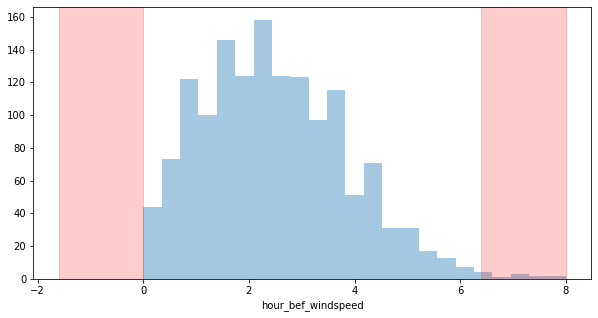

In [177]:
plt.figure(figsize=(10,5))

sns.distplot(train.hour_bef_windspeed, kde=False)

# 이상치 영역 박스 그리기
plt.axvspan(xmin=lower, xmax=train.hour_bef_windspeed.min(), alpha=0.2, color='red')
plt.axvspan(xmin=upper, xmax=train.hour_bef_windspeed.max(), alpha=0.2, color='red')

### hour_bef_windspeed 이상치 11개 제거

In [178]:
train['hour_bef_windspeed'] = data_hour_bef_windspeed['hour_bef_windspeed']

In [179]:
train['hour_bef_windspeed'].isnull().sum()

11

In [180]:
train['hour_bef_windspeed'].fillna(value = train.groupby('hour').mean()['hour_bef_windspeed'].mean(), inplace = True)

In [181]:
train['hour_bef_windspeed'].isnull().sum()

0

In [182]:
features = ['hour', 'hour_bef_temperature', 'hour_bef_precipitation', 'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility', 
            'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5']
X_train = train[features]
y_train = train['count']
X_test = test[features]

In [183]:
print(X_train.shape)
print(y_train.shape)
print(X_train.shape)

(1459, 9)
(1459,)
(1459, 9)


## 현재까지 가장 오차 적었던 DecisionTreeRegressor으로 예측

In [184]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [185]:
model100 = RandomForestRegressor(n_estimators = 100, random_state = 0)

model100.fit(X_train, y_train)

ypred1 = model100.predict(X_test)

## csv 파일 저장

In [186]:
submission['count'] = ypred1
submission.to_csv("DTR100_IQR.csv", index = False)